In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D

東京大学数理・データサイエンスコンソーシアム 社会人向け講座 2019年秋

# 解析・線形代数入門 〜データサイエンスのための〜

# レポート課題4 (回答例)

解答者氏名: 

採点者氏名: 

* 以下のセルに解答・図を描くためのPythonスクリプト・プロットの結果を記入せよ。CodeセルやMarkdownセルは必要に応じて付け加えてもよい
* 記入したノートブックは採点者に送ること。採点者は採点・講評を記入した後、ファイルを解答者に返却するとともに、 https://sendfile.s.u-tokyo.ac.jp/public/s21wgAlJLcUA4tkBNURuCfFlVm5VpoPNqdcZ_mqC4GmC にアップロードせよ。(課題ごとにアップロードURLは異なっているので注意)
* アップロードするファイル名は「解答者氏名_採点者氏名.ipynb」、また氏名はフルネームとすること
* 提出締切: 11月21日(木) 17:00
* 質問や不明な点がある場合は、遠慮なく藤堂<[wistaria@phys.s.u-tokyo.ac.jp](mailto:wistaria@phys.s.u-tokyo.ac.jp)>まで

---
### 問4-1
$\displaystyle A = \begin{bmatrix} 1 & 9 \\ 9 & 1 \end{bmatrix}$について

(a) 固有値$\lambda_1, \lambda_2$と対応する固有ベクトル$\vec{v}_1, \vec{v}_2$を求めよ

* 固有方程式 $\det(\lambda E - A) = (\lambda - 1)^2 - 81 = \lambda^2 - 2\lambda-80 = (\lambda + 8) (\lambda - 10) = 0$ <br>
  したがって、固有値は $\lambda_1 = -8$ と $\lambda_2 = 10$
* $\lambda_1 = -8$に対応する固有値 $\vec{v}_1 = \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}$が満たす方程式は<br>
  $(\lambda_1 E - A) \vec{v}_1 = \begin{bmatrix} -9 & -9 \\ -9 & -9 \end{bmatrix} \begin{bmatrix} x_1 \\ y_1 \end{bmatrix} = 0$<br>
  これが満たされるためには$x_1 = -y_1$が成り立てばよい。したがって、例えば$\vec{v}_1 = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$<br>
  あるいは、長さが1になるように規格化して、$\vec{v}_1 = \begin{bmatrix} -\sqrt{2}/2 \\ \sqrt{2}/2 \end{bmatrix}$ ($\vec{v}_2 = \begin{bmatrix} \sqrt{2}/2 \\ -\sqrt{2}/2 \end{bmatrix}$でもよい)
* $\lambda_2 = 10$に対応する固有値 $\vec{v}_2 = \begin{bmatrix} x_2 \\ y_2 \end{bmatrix}$が満たす方程式は<br>
  $(\lambda_2 E - A) \vec{v}_2 = \begin{bmatrix} 9 & -9 \\ -9 & 9 \end{bmatrix} \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = 0$<br>
  これが満たされるためには$x_2 = y_2$が成り立てばよい。したがって、例えば$\vec{v}_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$<br>
  あるいは、長さが1になるように規格化して、$\vec{v}_2 = \begin{bmatrix} \sqrt{2}/2 \\ \sqrt{2}/2 \end{bmatrix}$ ($\vec{v}_2 = \begin{bmatrix} -\sqrt{2}/2 \\ -\sqrt{2}/2 \end{bmatrix}$でもよい)

Numpyで固有値・固有ベクトルを求めるには以下のようにする。$D$に固有値、$P$に固有値(縦ベクトル)を横に並べた$2 \times 2$の行列が入る

In [2]:
A = numpy.array([[1,9],[9,1]]);
D, P = numpy.linalg.eigh(A);
print(D);
print(P);

[-8. 10.]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


(b) 2つの固有ベクトルの内積$\vec{v}_1 \cdot \vec{v}_2 = {}^t\vec{v}_1 \vec{v}_2$が零であることを確認せよ。(対称行列の場合、相異なる固有値に対応する固有ベクトルは互いに直交する。一般の行列の場合には直交しないことに注意)

$\vec{v}_1 \cdot \vec{v}_2 = {}^t\vec{v}_1 \vec{v}_2 = \begin{bmatrix} \sqrt{2}/2 & \sqrt{2}/2 \end{bmatrix} \begin{bmatrix} \sqrt{2}/2 \\ -\sqrt{2}/2 \end{bmatrix} = 1-1 = 0$

あるいは、`eigh()` で求めた P を用いて

In [3]:
P.transpose() @ P

array([[1., 0.],
       [0., 1.]])

この非対角成分(1,2)が$\vec{v}_1 \cdot \vec{v}_2 = {}^t\vec{v}_1 \vec{v}_2$を表す

(c) 長さが1 (${}^t\vec{v} \vec{v} = 1$)になるように定数で割って「規格化」した固有ベクトルを並べたものを$P$とすると、${}^tPP=E$、すなわち$P$は直交行列となることを示せ

$P$は上ですでに求めた。${}^tPP=E$となることも確かめた

(d) 行列$A$による線形変換はどのような変換か、固有値と固有ベクトルをもとに予想せよ。Pythonでグラフを描き、その予想を確認せよ

$\vec{v}_1 = \begin{bmatrix} \sqrt{2}/2 \\ \sqrt{2}/2 \end{bmatrix}$は、xy平面上で右斜め上45度の直線($y=x$)の方向、また、$\vec{v}_2 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$は、右斜め下45度の直線($y=-x$)の方向を表す<br>
したがって、$A$による線形変換は、$y=x$に沿って10倍に、$y=-x$に沿って-8倍(反転して8倍)する変換である (行列式=固有値の積が負なので、変換された図形は裏返る)

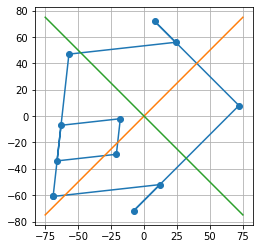

In [4]:
H = numpy.array([[-6, -6, -8, 0, 8, 6, 6, -3, -3, 0, 0, -6],
                           [-7, 2, 0, 8, 0, 2, -7, -7, -2, -2, -7, -7]]);
A = numpy.array([[1, 9], [9, 1]]);
C = A @ H;
x = numpy.linspace(-75,75);
pyplot.plot(C[0,:], C[1,:], "o-");
pyplot.plot(x, x);
pyplot.plot(x, -x);
pyplot.gca().set_aspect('equal');
pyplot.grid(which="major");

### 問4-1 採点・講評

---
### 問4-2
行列$A=\begin{bmatrix} 0.8 & 0.3 \\ 0.2 & 0.7 \end{bmatrix}$について

(a) 固有値と固有ベクトルを求めよ

* 固有方程式 $\det(\lambda E - A) = (\lambda - 0.8) * (\lambda - 0.7) - 0.3 * 0.2 = \lambda^2 - 1.5\lambda + 0.5 = (\lambda - 1) (\lambda - 0.5) = 0$ <br>
  したがって、固有値は $\lambda_1 = 1$ と $\lambda_2 = 1/2$
* $\lambda_1 = 1$に対応する固有値 $\vec{v}_1 = \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}$が満たす方程式は<br>
  $(\lambda_1 E - A) \vec{v}_1 = \begin{bmatrix} 0.2 & -0.3 \\ -0.2 & 0.3 \end{bmatrix} \begin{bmatrix} x_1 \\ y_1 \end{bmatrix} = 0$<br>
  これが満たされるためには$0.2 x_1 = 0.3 y_1$が成り立てばよい。したがって、例えば$\vec{v}_1 = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$<br>
  あるいは、長さが1になるように規格化して、$\vec{v}_1 = \begin{bmatrix} 3\sqrt{13}/13 \\ 2\sqrt{13}/13 \end{bmatrix}$
* $\lambda_2 = 0.5$に対応する固有値 $\vec{v}_2 = \begin{bmatrix} x_2 \\ y_2 \end{bmatrix}$が満たす方程式は<br>
  $(\lambda_2 E - A) \vec{v}_2 = \begin{bmatrix} -0.3 & -0.3 \\ -0.2 & -0.2 \end{bmatrix} \begin{bmatrix} x_2 \\ y_2 \end{bmatrix} = 0$<br>
  これが満たされるためには$x_2 = -y_2$が成り立てばよい。したがって、例えば$\vec{v}_2 = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$<br>
  あるいは、長さが1になるように規格化して、$\vec{v}_2 = \begin{bmatrix} -\sqrt{2}/2 \\ \sqrt{2}/2 \end{bmatrix}$

In [5]:
A = numpy.array([[0.8, 0.3],[0.2,0.7]]);
D, P = numpy.linalg.eig(A);
print(D);
print(P);

[1.  0.5]
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


(b) $A$が$A=PDP^{-1}$と対角化されているとき、$A^2 = PDP^{-1} PDP^{-1} = PD(P^{-1}P)DP^{-1} = PD^2P^{-1}$、$A^3 = PDP^{-1} PDP^{-1} PDP^{-1} = PD^3P^{-1}$が成り立つことを用いて、$A^n$ (ただし $n \ge 1$)を求め、$\lim_{n \rightarrow \infty} A^n$を予想せよ

$D$は対角行列なので、$D^n = \begin{bmatrix} \lambda_1^n & 0 \\ 0 & \lambda_2^n \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & 1/2^n \end{bmatrix}$ (対角要素=固有値が$n$乗になる)<br>
したがって、$A^n = P D^n P^{-1}$<br>
$P = \begin{bmatrix} 3\sqrt{13}/13 & -\sqrt{2}/2 \\ 2\sqrt{13}/13 & \sqrt{2}/2 \end{bmatrix}$から
$P^{-1} = \frac{\sqrt{26}}{5} \begin{bmatrix} \sqrt{2}/2 & \sqrt{2}/2 \\ -2\sqrt{13}/13 & 3\sqrt{13}/13 \end{bmatrix}$を用いて<br>
$A^n = P D^n P^{-1} = \frac{1}{5} \begin{bmatrix} 3 + 2/2^n & 3 - 3/2^n \\ 2 - 2/2^n & 2 + 3/2^n \end{bmatrix}$<br>
$n \rightarrow \infty$の極限では、それぞれの要素の第2項は零、したがって$\displaystyle \lim_{n \rightarrow \infty} A^n = \frac{1}{5} \begin{bmatrix} 3 & 3 \\ 2 & 2\end{bmatrix}$<br>

(c) Pythonで$A^2, A^3, A^4, \cdots$を計算し、(b)の予想を確認せよ

In [6]:
A @ A

array([[0.7 , 0.45],
       [0.3 , 0.55]])

In [7]:
A @ A @ A

array([[0.65 , 0.525],
       [0.35 , 0.475]])

Numpyで行列のべき乗を計算するには`numpy.linalg.matrix_power()`を使う (`A**100`などとするとそれぞれの要素が100乗されてしまい、行列の100乗にはならないことに注意)

In [8]:
print('A^2 = ', numpy.linalg.matrix_power(A, 2));
print('A^3 = ', numpy.linalg.matrix_power(A, 3));
print('A^4 = ', numpy.linalg.matrix_power(A, 4));
print('A^5 = ', numpy.linalg.matrix_power(A, 5));
print('A^10 = ', numpy.linalg.matrix_power(A, 10));
print('A^100 = ', numpy.linalg.matrix_power(A, 100));

A^2 =  [[0.7  0.45]
 [0.3  0.55]]
A^3 =  [[0.65  0.525]
 [0.35  0.475]]
A^4 =  [[0.625  0.5625]
 [0.375  0.4375]]
A^5 =  [[0.6125  0.58125]
 [0.3875  0.41875]]
A^10 =  [[0.60039063 0.59941406]
 [0.39960938 0.40058594]]
A^100 =  [[0.6 0.6]
 [0.4 0.4]]


これは上で対角化により求めた予想と一致している

###  問4-2 採点・講評

---
### 問4-3
2変数関数$f(x,y) = xy(x^2+y^2-1)$を考える

(a) $f_x(x,y)=0, f_y(x,y)=0$から極値の候補となる点を求めよ

$f_x = y(x^2+y^2-1) + xy(2x) = y(3x^2+y^2-1)=0$<br>
$f_y = x(x^2+y^2-1) + xy(2y) = x(x^2+3y^2-1)=0$<br>

* $(x,y)=(0,0)$は解
* $x=0$, $y \ne 0$のとき ⇒ $y^2-1=0$ ⇒ $y=\pm 1$
* $x \ne 0$, $y=0$のとき ⇒ $x^2-1=0$ ⇒ $x=\pm 1$
* $x \ne 0$, $y \ne 0$のとき、$3x^2+y^2-1=0$から$y^2=1-3x^2$。これを$x^2+3y^2-1=0$に代入 ⇒ $x = \pm \frac{1}{2}$ ⇒ $y = \pm \frac{1}{2}$

よって、$(x,y)=(0,0), (0,1), (0,-1), (1,0), (-1,0), (\frac{1}{2},\frac{1}{2}), (\frac{1}{2},-\frac{1}{2}),(-\frac{1}{2},\frac{1}{2}),(-\frac{1}{2},-\frac{1}{2})$の9点

(b) それぞれの点における2階偏微分係数$f_{xx}, f_{xy}, f_{yx}, f_{yy}$の値を求めよ

$f_{xx} = f_{yy} = 6xy$, $f_{xy}=f_{yx}=3x^2+3y^2-1$より

* $(x,y)=(0,0)$ ⇒ $f_{xx} = f_{yy} = 0$, $f_{xy}=f_{yx}=-1$
* $(x,y)=(0,1),(0,-1),(1,0),(-1,0)$ ⇒ $f_{xx} = f_{yy} = 0$, $f_{xy}=f_{yx}=2$
* $(x,y)=(\frac{1}{2},\frac{1}{2}),(-\frac{1}{2},-\frac{1}{2})$ ⇒ $f_{xx} = f_{yy} = \frac{3}{2}$, $f_{xy}=f_{yx}= \frac{1}{2}$
* $(x,y)=(\frac{1}{2},-\frac{1}{2}),(\frac{1}{2},-\frac{1}{2})$ ⇒ $f_{xx} = f_{yy} = -\frac{3}{2}$, $f_{xy}=f_{yx}= \frac{1}{2}$

(c) それぞれの点におけるヘッセ行列$H=\begin{bmatrix} f_{xx} & f_{xy} \\ f_{yx} & f_{yy} \end{bmatrix}$の固有値を求め、それぞれの点が極大値、極小値、鞍点のどれか判定せよ

* $(x,y)=(0,0)$ ⇒ $H = \begin{bmatrix} 0 & -1 \\ -1 & 0 \end{bmatrix}$ ⇒ $\lambda = 1,-1$ ⇒ 鞍点
* $(x,y)=(0,1),(0,-1),(1,0),(-1,0)$ ⇒ $H = \begin{bmatrix} 0 & 2 \\ 2 & 0 \end{bmatrix}$ ⇒ $\lambda = 2,-2$ ⇒ 鞍点
* $(x,y)=(\frac{1}{2},\frac{1}{2}),(-\frac{1}{2},-\frac{1}{2})$ ⇒ $H = \begin{bmatrix} \frac{3}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{3}{2} \end{bmatrix}$ ⇒ $\lambda = 1,2$ ⇒ 極小点
* $(x,y)=(\frac{1}{2},-\frac{1}{2}),(-\frac{1}{2},\frac{1}{2})$ ⇒ $H = \begin{bmatrix} -\frac{3}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{3}{2} \end{bmatrix}$ ⇒
$\lambda = -1,-2$ ⇒ 極大点

### 問4-3 採点・講評